In [2]:
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# stats
from scipy import stats

# preprocessing
from sklearn.preprocessing import StandardScaler

# cross validataion
from sklearn.model_selection import (train_test_split, RandomizedSearchCV)

# ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# power transformation
from sklearn.preprocessing import PowerTransformer

# warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("cardekho_imputated.csv")

In [4]:
df.head()

Unnamed: 0       car_name    brand     model  min_cost_price  \
0           0    Maruti Alto   Maruti      Alto    3.570039e+05   
1           1  Hyundai Grand  Hyundai     Grand    7.110000e+05   
2           2    Hyundai i20  Hyundai       i20    8.540829e+05   
3           3    Maruti Alto   Maruti      Alto    3.570039e+05   
4           4  Ford Ecosport     Ford  Ecosport    1.014000e+06   

   max_cost_price  vehicle_age  km_driven seller_type fuel_type  \
0    4.654015e+05            9     120000  Individual    Petrol   
1    7.480000e+05            5      20000  Individual    Petrol   
2    1.307926e+06           11      60000  Individual    Petrol   
3    4.654015e+05            9      37000  Individual    Petrol   
4    1.379000e+06            6      30000      Dealer    Diesel   

  transmission_type  mileage  engine  max_power  seats  selling_price  
0            Manual    19.70     796      46.30      5         120000  
1            Manual    18.90    1197      82.00      5         550000  
2            Manual    17.00    1197      80.00      5         215000  
3            Manual    20.92     998      67.10      5         226000  
4            Manual    22.77    1498      98.59      5         570000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   min_cost_price     15411 non-null  float64
 5   max_cost_price     15411 non-null  float64
 6   vehicle_age        15411 non-null  int64  
 7   km_driven          15411 non-null  int64  
 8   seller_type        15411 non-null  object 
 9   fuel_type          15411 non-null  object 
 10  transmission_type  15411 non-null  object 
 11  mileage            15411 non-null  float64
 12  engine             15411 non-null  int64  
 13  max_power          15411 non-null  float64
 14  seats              15411 non-null  int64  
 15  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(6

In [6]:
#Column types
num_cols = ['min_cost_price','max_cost_price','vehicle_age','km_driven','mileage','engine','max_power','selling_price']
cat_cols = ['brand','model','seller_type','fuel_type','transmission_type','seats']

In [7]:
#dropping car_name because we seperated into two columns.
df.drop(['car_name'],axis=1,inplace=True)

In [8]:
round(df[num_cols].describe().T,2)

count        mean          std       min        25%  \
min_cost_price  15411.0  5892971.12  56698513.93  311000.0  668000.00   
max_cost_price  15411.0  1962623.92   2889635.64  436000.0  872866.67   
vehicle_age     15411.0        6.04         3.01       0.0       4.00   
km_driven       15411.0    55616.48     51618.55     100.0   30000.00   
mileage         15411.0       19.70         4.17       4.0      17.00   
engine          15411.0     1486.06       521.11     793.0    1197.00   
max_power       15411.0      100.59        42.97      38.4      74.00   
selling_price   15411.0   774971.12    894128.36   40000.0  385000.00   

                       50%        75%           max  
min_cost_price   855000.00  1284000.0  9.880000e+08  
max_cost_price  1206000.00  1743000.0  9.110000e+07  
vehicle_age           6.00        8.0  2.900000e+01  
km_driven         50000.00    70000.0  3.800000e+06  
mileage              19.67       22.7  3.354000e+01  
engine             1248.00     1582.0  6.592000e+03  
max_power            88.50      117.3  6.260000e+02  
selling_price    556000.00   825000.0  3.950000e+07

In [9]:
# replacing 0 to median vehicle age
df['vehicle_age'].replace(0,df['vehicle_age'].median(),inplace=True)

# replacing 0 to median seats
df['seats'].replace(0,df['seats'].median(),inplace=True)

In [10]:
brand_df =df['brand'].value_counts().reset_index()
brand_df.columns = ['brand','count']

px.bar(brand_df[0:25],y='count',x='brand',title='Top car brand',template='simple_white',color='count')

In [11]:
model_df =df['model'].value_counts().reset_index()
model_df.columns = ['model','count']

px.bar(model_df[0:25],y='count',x='model',title='Top Car model',template='gridon')

In [12]:
car_list =['seller_type','fuel_type','transmission_type','seats']
    
seller_type_df =df['seller_type'].value_counts().reset_index()
seller_type_df.columns = ['seller_type','count']

px.pie(seller_type_df,values='count',names='seller_type',title='seller_type',width=550,height=450,hole=.60)

In [13]:
fuel_df =df['fuel_type'].value_counts().reset_index()
fuel_df.columns = ['Fuel_type','count']

px.pie(fuel_df,values='count',names='Fuel_type',title='Fuel Type',template='ggplot2',width=550,height=450,hole=.60)

In [14]:
trans_df =df['transmission_type'].value_counts().reset_index()
trans_df.columns = ['Transmission_type','count']

px.pie(trans_df,values='count',names='Transmission_type',title='transmission_type',template='simple_white',width=550,height=450,hole=.60)

In [15]:
seats_df =df['seats'].value_counts().reset_index()
seats_df.columns = ['seats','count']
px.bar(seats_df,y='count',x='seats',title='Number of seats',template='none')

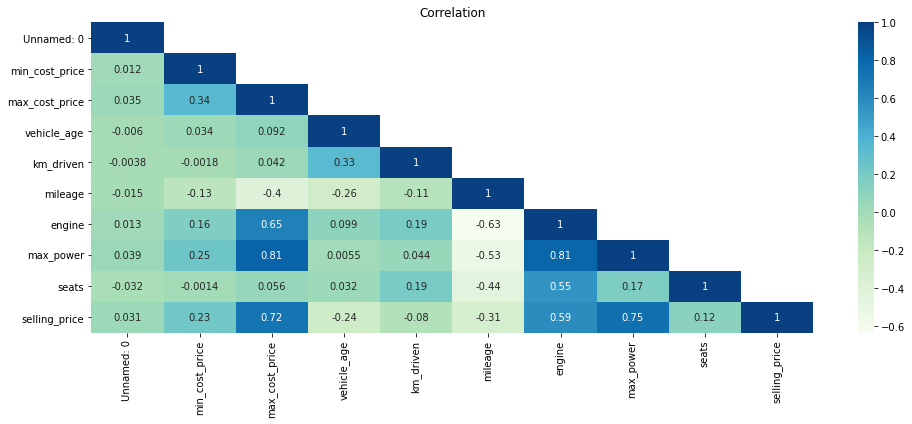

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,cmap='GnBu',mask=np.triu(df.corr(),+1));
plt.title('Correlation');
plt.tight_layout()

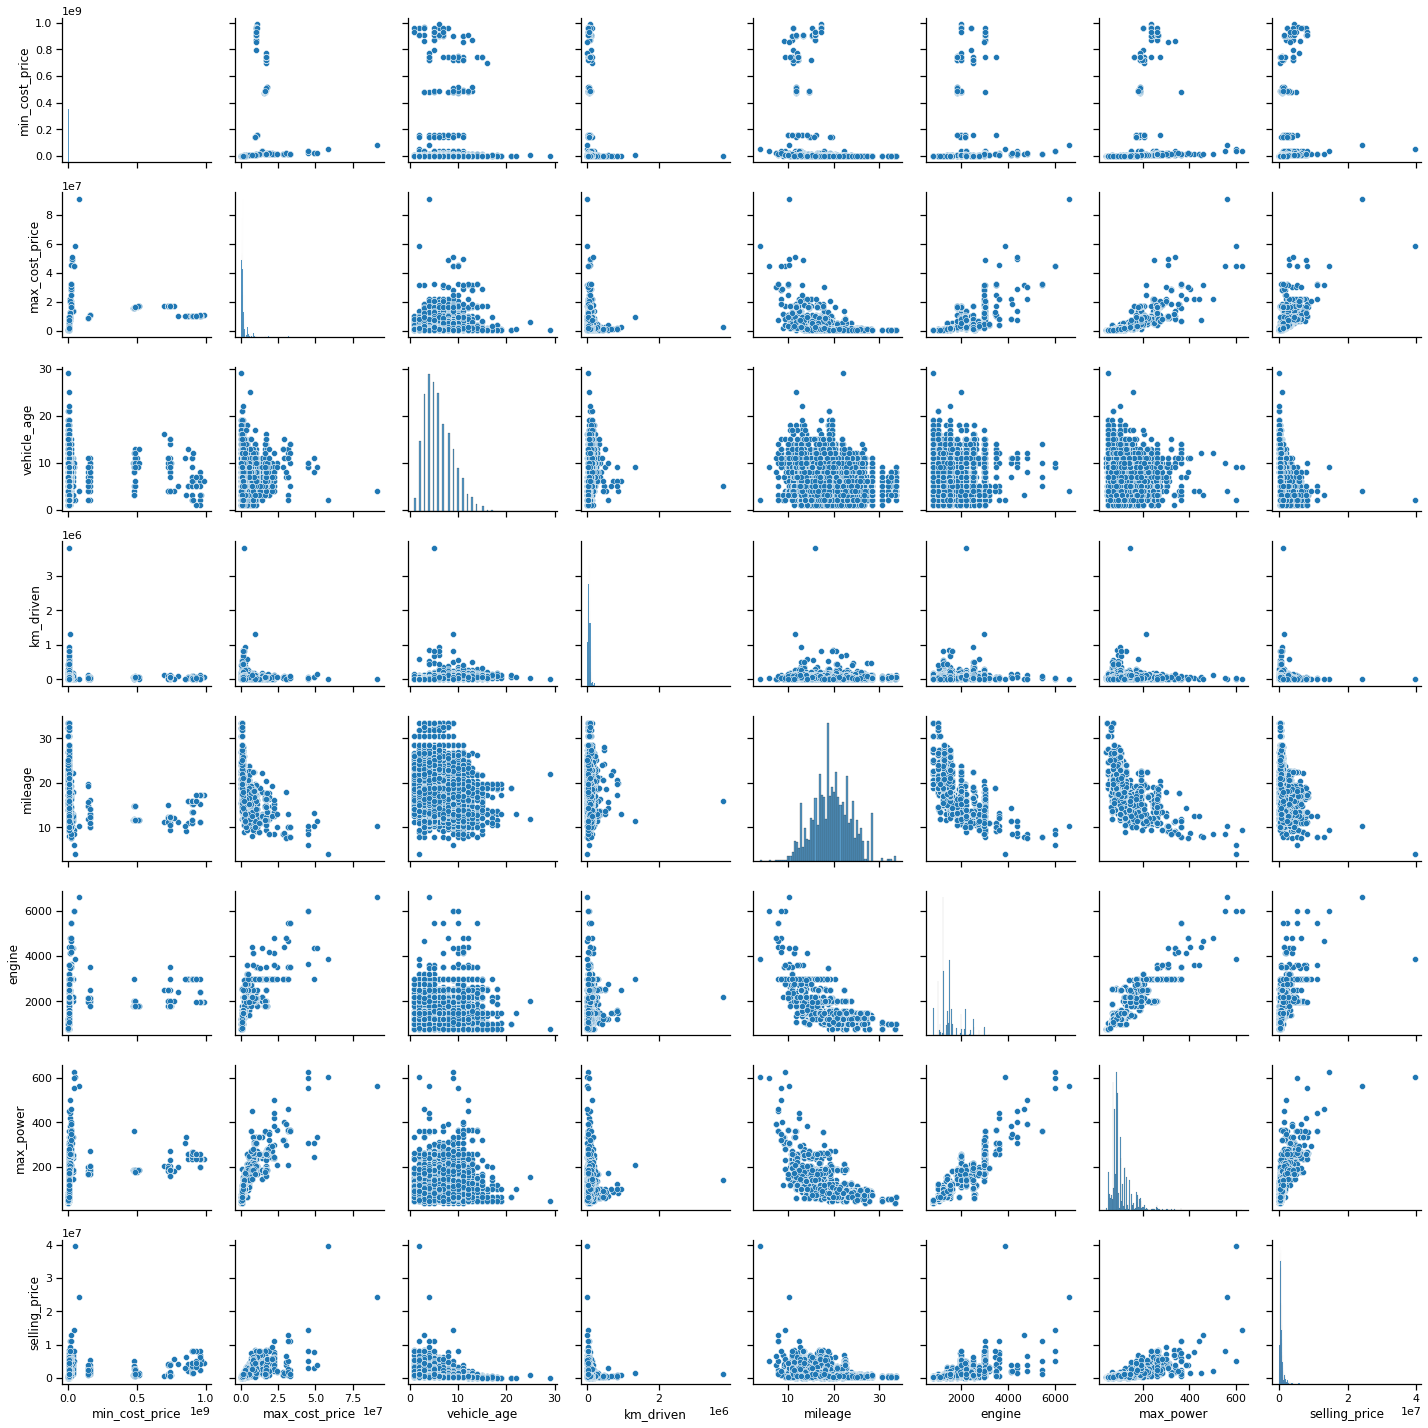

In [17]:
# pairplot
sns.set_context(context='notebook',font_scale=1)
sns.pairplot(df[num_cols]);
plt.tight_layout()

In [18]:
# duplicated values

dups = df.duplicated()
dups.sum()

0

In [19]:
# encoding all categorical variables
cols_encode = ['brand','model','seller_type','fuel_type','transmission_type','seats']
target ='selling_price'


for col in cols_encode:
    print(col)
    
    # groupby categorical variable 
    gb_df=df.groupby(col)[target].median().reset_index()
    
    # rank based on the median price of the variable
    gb_df['rank'] = gb_df[target].rank(ascending=1,method='first').astype(int)
    
    # zip and save it in dictionary so we can map it
    name_dict = dict(zip(gb_df[col],gb_df['rank']))
    
    # encode the variable or column using dictionary 
    df[col]=df[col].map(name_dict)

df.head()

brand
model
seller_type
fuel_type
transmission_type
seats


Unnamed: 0  brand  model  min_cost_price  max_cost_price  vehicle_age  \
0           0      3      2    3.570039e+05    4.654015e+05            9   
1           1      5     19    7.110000e+05    7.480000e+05            5   
2           2      5     33    8.540829e+05    1.307926e+06           11   
3           3      3      2    3.570039e+05    4.654015e+05            9   
4           4      7     41    1.014000e+06    1.379000e+06            6   

   km_driven  seller_type  fuel_type  transmission_type  mileage  engine  \
0     120000            1          3                  1    19.70     796   
1      20000            1          3                  1    18.90    1197   
2      60000            1          3                  1    17.00    1197   
3      37000            1          3                  1    20.92     998   
4      30000            3          4                  1    22.77    1498   

   max_power  seats  selling_price  
0      46.30      1         120000  
1      82.00      1         550000  
2      80.00      1         215000  
3      67.10      1         226000  
4      98.59      1         570000

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

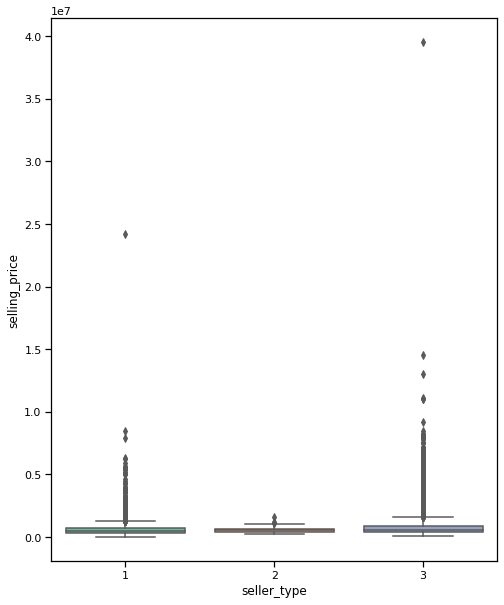

In [20]:
figure = plt.figure(figsize=(8,10))
sns.boxplot(x='seller_type',y='selling_price', data=df, palette="Set2")

In [21]:
def treat_outlier(x):
    sorted(x)
    q1,q3= np.percentile(x,[25,75])
    IQR= q3-q1
    lowerlimit = q1-1.5*IQR
    upperlimit = q3 +1.5*IQR
    return lowerlimit,upperlimit

In [22]:
num_col = ['min_cost_price', 'max_cost_price','vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

for column in df[num_col].columns:
    lr,ur=treat_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [23]:
#Data Split
X = df.drop(['selling_price'],axis=1)
y= df.pop('selling_price')

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [25]:
# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn import metrics


def metrics_view(X_test, y_test, X_train, y_train, model):
    
    # R_sqare on test set
    R2_test = model.score(X_test,y_test)
    R2_train = model.score(X_train, y_train)

    # model metrics
    reg_predict_test = model.predict(X_test)
    reg_predict_train= model.predict(X_train)

    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,reg_predict_test))
       
    
    print('Root Mean Square Error on test  :',RMSE_test)
    print('R_square on Test set :',R2_test)
    print('R_square on Train set :',R2_train)

In [27]:
# linear regression

# model
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

# validate on test
metrics_view(X_test, y_test, X_train, y_train, LR_model)

Root Mean Square Error on test  : 716314.8592870181
R_square on Test set : 0.4931780416175159
R_square on Train set : 0.6336777719413651


In [28]:
# model
RF_model =RandomForestRegressor(n_estimators=600,max_depth=7)
RF_model.fit(X_train,y_train)

# validate on test
metrics_view(X_test,y_test,X_train,y_train,RF_model)

Root Mean Square Error on test  : 411292.40258422703
R_square on Test set : 0.832910608790888
R_square on Train set : 0.9487126264282827
